# <u><i> BitCoin
## Analyse the BitCoin Variation observed in the market.

Predicting the house Price of the based on various variables given: 
1) Timestamp<br>
2) Open<br>
3) High<br>
4) Low<br>
5) Close<br>
6) Volume_(BTC)<br>
7) Volume_(Currency)<br>
8) Weighted_Price

## LOADING DATASET

In [3]:
import warnings
warnings.filterwarnings('ignore')  #Eliminating the Warnings message while program in execution.
import pandas as pd

df = pd.read_csv(r'C:\Users\SAHIL YADAV\Desktop\Copy of Bitcoin.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(df.index)

2099760

## UPDATING VALUES AND REMOVING OUTLIERS

### 1) REMOVING NULL VALUES

In [3]:
df.isna().sum()

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isna().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

### 2) TRANSFORMING VARIABLES FROM OBJECT TYPE TO NUMERIC TYPE

In [5]:
df.dtypes # No need since all variables are in numeric data type

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [6]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
7,1417412400,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
51,1417415040,370.00,370.00,370.00,370.00,0.010000,3.700000,370.000000
77,1417416600,370.00,370.00,370.00,370.00,0.026556,9.825550,370.000000
1436,1417498140,377.00,377.00,377.00,377.00,0.010000,3.770000,377.000000
...,...,...,...,...,...,...,...,...
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083168,4006.017232
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991


## 3) Checking for outliers for the input features using Boxplot.

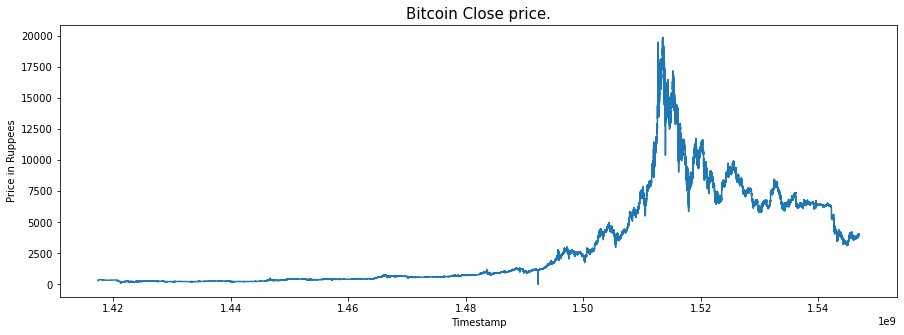

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'],df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in Ruppees')
plt.xlabel('Timestamp')
plt.show()

The above graph shows the prices of BitCoin Stocks plotted with respect to Timestamp variable. The graph shows that there is a significant rise in the rates of the stock rates available at different Timestamp.


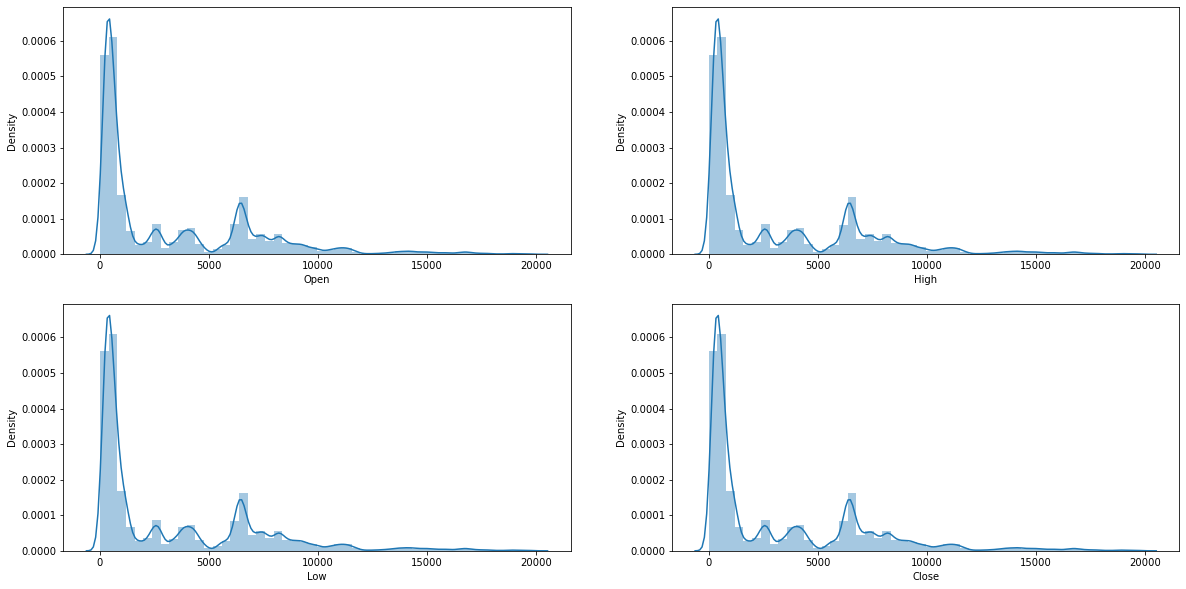

In [9]:
import seaborn as sb

features = ['Open', 'High', 'Low', 'Close'] 
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

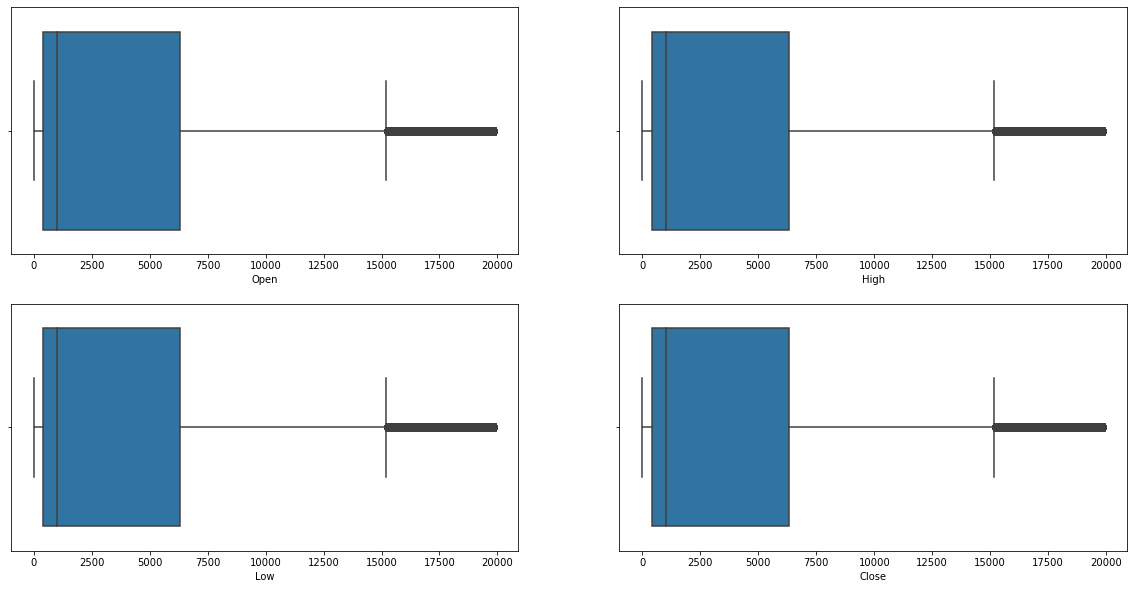

In [10]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.boxplot(df[col])
plt.show()

The boxplot diagram when drawn for target variable and with other variables we observed too many outliers in the data which far are apart and different from regular trend.<br>
This means that the prices of the stock have varied significantly in a very short duration of time.

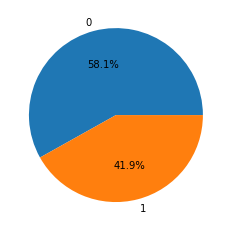

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

In [11]:
import numpy as np

df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

plt.pie(df['target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(100, 100))

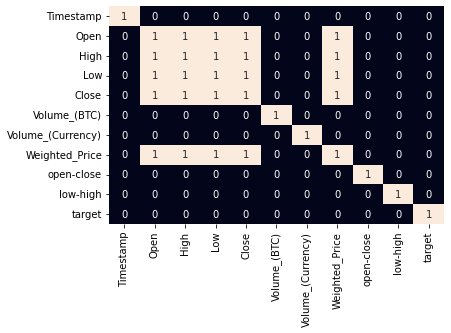

In [12]:
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

As our concern is with the highly correlated features only so, we will visualize our heatmap as per that criteria only.

## SPLITING THE DATASET INTO TRAINING DATA AND TESTING DATA

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df[['open-close', 'low-high']]
y = df['target']
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

## EVALUATION OF MODEL

LogisticRegression() : 
Training Accuracy :  0.5565832725283782
Validation Accuracy :  0.5573228894229598



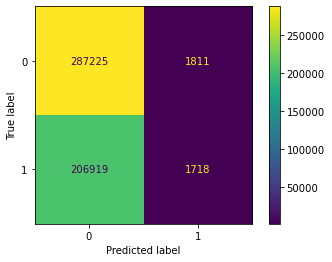

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

models = [LogisticRegression(), SVC(kernel='poly', probability=True)]

for i in range(2):
    models[i].fit(x_train, y_train)
    
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict_proba(x_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(y_test, models[i].predict_proba(x_test)[:,1]))
    print()
    metrics.plot_confusion_matrix(models[0], x_test, y_test)
    plt.show()
